In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.model import *
from ts.utility import Utility
from ts.plot import Plot

%matplotlib inline

# Data

In [2]:
n = 4000

univarData = StandardGenerator('extreme_long').generate(n)
print(univarData.shape, univarData.dtype)

(4000,) float64


In [3]:
trainSize = 3000

trainData, testData = Utility.trainTestSplit(univarData, trainSize,)

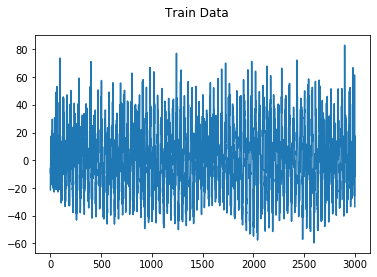

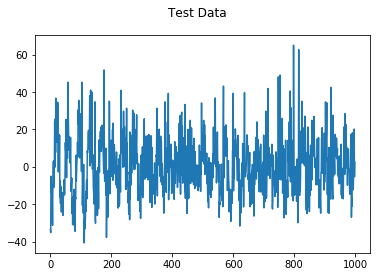

In [4]:
Plot.plotDataCols(trainData, title='Train Data')
Plot.plotDataCols(testData, title='Test Data')

## GMM-HMM model

True


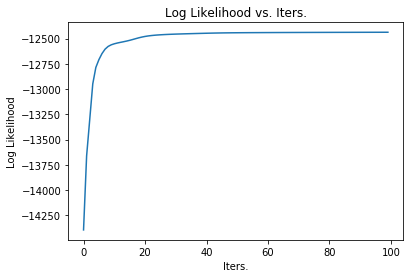

In [5]:
numStates = 6
numMixtureComp = 4
dimension = 1
d = 50
numIterations = 100
threshold = 0.0

model = GmmHmmForecast(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    d=d,
    numIterations=numIterations,
    threshold=threshold
)

likelihoodValues = model.train([np.expand_dims(trainData, axis=1)])
plt.plot(likelihoodValues)
plt.xlabel('Iters.')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Iters.')

print(model.model.monitor_.converged)

(950, 1) (950,)


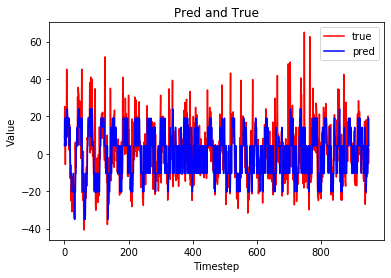

In [6]:
minValue = trainData.min()
maxValue = trainData.max()
numValues = 30
discParamSet = [np.linspace(minValue, maxValue, numValues)]

pred = model.predict(np.expand_dims(testData, axis=1), discParamSet)
target = testData[d:]

print(pred.shape, target.shape)
Plot.plotPredTrue(pred, target)

## GRU model

Epoch 1/25
6/6 [==============================] - 2s 354ms/step - loss: 579.1108
Epoch 2/25
6/6 [==============================] - 2s 350ms/step - loss: 537.8622
Epoch 3/25
6/6 [==============================] - 2s 355ms/step - loss: 482.7139
Epoch 4/25
6/6 [==============================] - 2s 351ms/step - loss: 443.1752
Epoch 5/25
6/6 [==============================] - 2s 352ms/step - loss: 415.0611
Epoch 6/25
6/6 [==============================] - 2s 354ms/step - loss: 396.7369
Epoch 7/25
6/6 [==============================] - 2s 364ms/step - loss: 381.2964
Epoch 8/25
6/6 [==============================] - 2s 367ms/step - loss: 366.8027
Epoch 9/25
6/6 [==============================] - 2s 353ms/step - loss: 354.9766
Epoch 10/25
6/6 [==============================] - 2s 356ms/step - loss: 345.5667
Epoch 11/25
6/6 [==============================] - 2s 364ms/step - loss: 338.4826
Epoch 12/25
6/6 [==============================] - 2s 400ms/step - loss: 331.9513
Epoch 13/25
6/6 [========

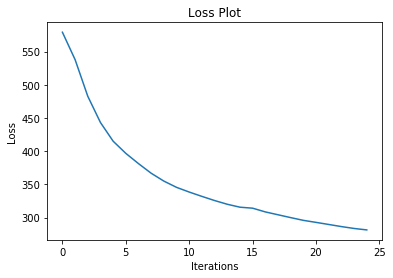

In [19]:
forecastHorizon = 1
stateSize = 20
activation = 'tanh'
numRnnLayers = 4
numTargetVariables = 1
numExoVariables = 0

model = GruForecast(
    forecastHorizon=forecastHorizon,
    stateSize=stateSize,
    activation=activation,
    numRnnLayers=numRnnLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

trainSequences = Utility.breakSeq(
    np.expand_dims(trainData, axis=1), 
    seqLength=500
)

seqLength = 500
numIterations = 25
optimizer = tf.optimizers.Adam(0.10)

losses = model.train(
    trainSequences=trainSequences,
    numIterations=numIterations
)

Plot.plotLoss(losses)

(999, 1) (999,)


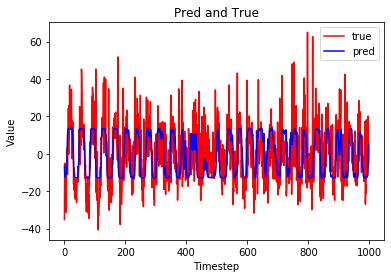

In [20]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

## LSTM Model

Epoch 1/25
6/6 [==============================] - 2s 352ms/step - loss: 585.7915
Epoch 2/25
6/6 [==============================] - 2s 326ms/step - loss: 551.3923
Epoch 3/25
6/6 [==============================] - 2s 320ms/step - loss: 512.8410
Epoch 4/25
6/6 [==============================] - 2s 322ms/step - loss: 482.1372
Epoch 5/25
6/6 [==============================] - 2s 325ms/step - loss: 453.0767
Epoch 6/25
6/6 [==============================] - 2s 321ms/step - loss: 431.2655
Epoch 7/25
6/6 [==============================] - 2s 324ms/step - loss: 411.4583
Epoch 8/25
6/6 [==============================] - 2s 324ms/step - loss: 398.6401
Epoch 9/25
6/6 [==============================] - 2s 320ms/step - loss: 386.8998
Epoch 10/25
6/6 [==============================] - 2s 319ms/step - loss: 374.3180
Epoch 11/25
6/6 [==============================] - 2s 335ms/step - loss: 364.6897
Epoch 12/25
6/6 [==============================] - 2s 343ms/step - loss: 354.8535
Epoch 13/25
6/6 [========

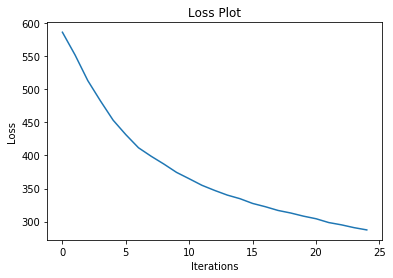

In [23]:
forecastHorizon = 1
stateSize = 20
activation = 'tanh'
numRnnLayers = 4
numTargetVariables = 1
numExoVariables = 0

model = LstmForecast(
    forecastHorizon=forecastHorizon,
    stateSize=stateSize,
    activation=activation,
    numRnnLayers=numRnnLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

trainSequences = Utility.breakSeq(
    np.expand_dims(trainData, axis=1), 
    seqLength=500
)

seqLength = 500
numIterations = 25
optimizer = tf.optimizers.Adam(0.2)

losses = model.train(
    trainSequences=trainSequences,
    numIterations=numIterations
)

Plot.plotLoss(losses)

(999, 1) (999,)


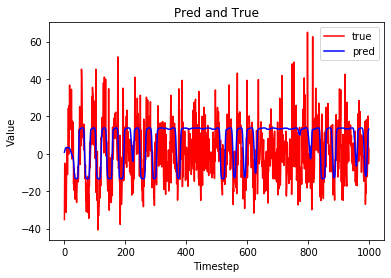

In [24]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

## Extreme Model 1

begin iteration 0
Completed Iteration: 0 | time taken:  34.12 sec | Avg Iteration Loss: 436.2882454201235
begin iteration 1
Completed Iteration: 1 | time taken:  35.05 sec | Avg Iteration Loss: 377.3603104481579
begin iteration 2
Completed Iteration: 2 | time taken:  34.49 sec | Avg Iteration Loss: 343.1169328813994
begin iteration 3
Completed Iteration: 3 | time taken:  34.78 sec | Avg Iteration Loss: 327.0512815320407
begin iteration 4
Completed Iteration: 4 | time taken:  36.33 sec | Avg Iteration Loss: 323.2278237108326
begin iteration 5
Completed Iteration: 5 | time taken:  33.61 sec | Avg Iteration Loss: 302.7588543312461
begin iteration 6
Completed Iteration: 6 | time taken:  32.34 sec | Avg Iteration Loss: 290.57668607891355
begin iteration 7
Completed Iteration: 7 | time taken:  35.02 sec | Avg Iteration Loss: 287.2709829261675
begin iteration 8
Completed Iteration: 8 | time taken:  33.84 sec | Avg Iteration Loss: 283.92163856558034
begin iteration 9
Completed Iteration: 9 | t

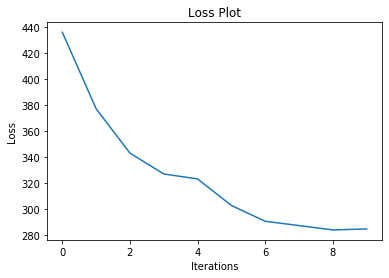

In [9]:
forecastHorizon = 1
memorySize = 60
windowSize = 50
encoderStateSize = 20
lstmStateSize = 20
numExoVariables = 0

model = ExtremeTime(
    forecastHorizon=forecastHorizon,
    memorySize=memorySize,
    windowSize=windowSize,
    encoderStateSize=encoderStateSize,
    lstmStateSize=lstmStateSize,
    numExoVariables=numExoVariables
)

sequenceLength = 500
numIterations = 10
optimizer = tf.optimizers.Adam(0.05)


losses = model.train(
    targetSeries=trainData,
    sequenceLength=sequenceLength,
    numIterations=numIterations,
    optimizer=optimizer
)

Plot.plotLoss(losses)

(999,) (999,)


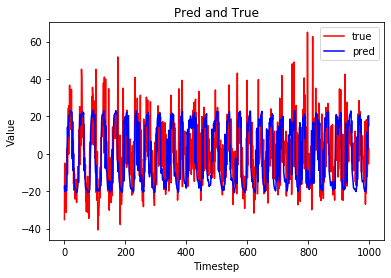

In [10]:
pred = model.predict(targetSeries=testData)

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

## Extreme Model 2

begin iteration 0
Completed Iteration: 0 | time taken:  61.09 sec | Avg Iteration Loss: 523.1188766368274
begin iteration 1
Completed Iteration: 1 | time taken:  62.76 sec | Avg Iteration Loss: 348.87731226012716
begin iteration 2
Completed Iteration: 2 | time taken:  61.67 sec | Avg Iteration Loss: 279.4948103480226
begin iteration 3
Completed Iteration: 3 | time taken:  63.21 sec | Avg Iteration Loss: 259.24802982954003
begin iteration 4
Completed Iteration: 4 | time taken:  63.68 sec | Avg Iteration Loss: 253.80719466794918
begin iteration 5
Completed Iteration: 5 | time taken:  60.57 sec | Avg Iteration Loss: 242.5956744704953
begin iteration 6
Completed Iteration: 6 | time taken:  63.32 sec | Avg Iteration Loss: 238.25596429969593
begin iteration 7
Completed Iteration: 7 | time taken:  56.58 sec | Avg Iteration Loss: 229.15190437493447
begin iteration 8
Completed Iteration: 8 | time taken:  58.51 sec | Avg Iteration Loss: 226.12343800726092
begin iteration 9
Completed Iteration: 9

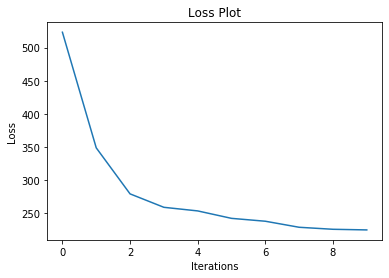

In [11]:
forecastHorizon = 1
memorySize = 60
windowSize = 50
embeddingSize = 20
contextSize = 20
numExoVariables = 0

model = ExtremeTime2(
    forecastHorizon=forecastHorizon,
    memorySize=memorySize,
    windowSize=windowSize,
    embeddingSize=embeddingSize,
    contextSize=contextSize,
    numExoVariables=numExoVariables
)

sequenceLength = 500
numIterations = 10
optimizer = tf.optimizers.Adam(0.05)


losses = model.train(
    targetSeries=trainData,
    sequenceLength=sequenceLength,
    numIterations=numIterations,
    optimizer=optimizer
)

Plot.plotLoss(losses)

(999,) (999,)


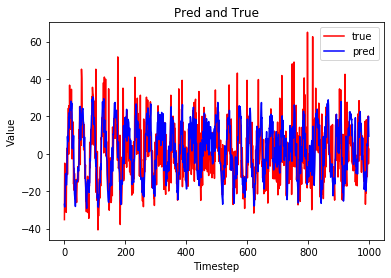

In [12]:
pred = model.predict(targetSeries=testData)

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

## MLP

Epoch 1/10
6/6 [==============================] - 0s 2ms/step - loss: 712.7622
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 262.3567
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 202.0356
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 180.1653
Epoch 5/10
6/6 [==============================] - 0s 2ms/step - loss: 178.4699
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 175.4039
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 173.0843
Epoch 8/10
6/6 [==============================] - 0s 2ms/step - loss: 170.5838
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss: 172.9940
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 169.7920


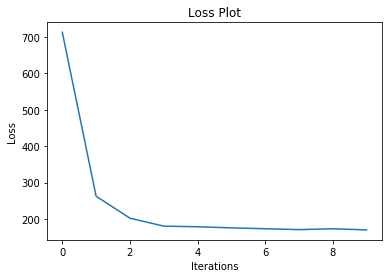

In [13]:
forecastHorizon = 1
lag = 50
activation = 'relu'
numUnitsPerLayer = 20
numLayers = 3
numTargetVariables = 1
numExoVariables = 0

model = DeepNN(
    forecastHorizon=1,
    lag=lag,
    activation=activation,
    numUnitsPerLayer=numUnitsPerLayer,
    numLayers=numLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

sequenceLength = 500
trainSequences = Utility.breakSeq(
    np.expand_dims(trainData, axis=1), 
    seqLength=500
)

numIterations = 10
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences,
    numIterations=numIterations,
    optimizer=optimizer
)
Plot.plotLoss(losses)

(949,) (949,)


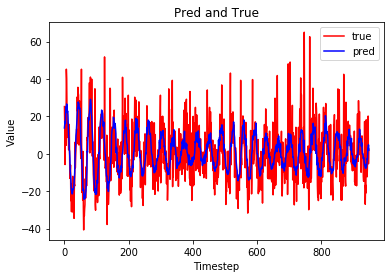

In [14]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[lag + forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)